In [13]:
import os 
from glob import glob
import pandas as pd
import itertools

In [6]:
root = 'C:/Users/quyennt72/Desktop/chinh_khach'
idendities = {}
for name in os.listdir(root):
    idendities[name] = []
    for img_path in glob(os.path.join(root, name, '*.jpg')):
        idendities[name].append(img_path)

In [7]:
positives = []

for key, values in idendities.items():
    
    #print(key)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            #print(values[i], " and ", values[j])
            positive = []
            positive.append(values[i])
            positive.append(values[j])
            positives.append(positive)

In [10]:
positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"

In [12]:
samples_list = list(idendities.values())

In [14]:
negatives = []

for i in range(0, len(idendities) - 1):
    for j in range(i+1, len(idendities)):
        #print(samples_list[i], " vs ",samples_list[j]) 
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        #print(cross_product)
        
        for cross_sample in cross_product:
            #print(cross_sample[0], " vs ", cross_sample[1])
            negative = []
            negative.append(cross_sample[0])
            negative.append(cross_sample[1])
            negatives.append(negative)

In [15]:
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"

In [17]:
df = pd.concat([positives, negatives]).reset_index(drop = True)

In [18]:
df.shape

(276, 3)

In [19]:
df.decision.value_counts()

No     143
Yes    133
Name: decision, dtype: int64

In [20]:
from deepface import DeepFace

In [21]:
instances = df[["file_x", "file_y"]].values.tolist()

In [25]:
for i in instances:
    print(i)

['C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phuc\\download (1).jpg', 'C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phuc\\download (10).jpg']
['C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phuc\\download (1).jpg', 'C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phuc\\download (2).jpg']
['C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phuc\\download (1).jpg', 'C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phuc\\download (3).jpg']
['C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phuc\\download (1).jpg', 'C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phuc\\download (4).jpg']
['C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phuc\\download (1).jpg', 'C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phuc\\download (5).jpg']
['C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phuc\\download (1).jpg', 'C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phuc\\download (6).jpg']
['C:/Users/quyennt72/Desktop/chinh_khach\\nguyen_xuan_phu

In [27]:
model_name = "VGG-Face"
distance_metric = "cosine"
detector_backend = "retinaface"
normalization = "VGGFace"

In [ ]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric, detector_backend=detector_backend, normalization=normalization)

In [29]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [30]:
df["distance"] = distances

In [31]:
tp_mean = round(df[df.decision == "Yes"].mean().values[0], 4)
tp_std = round(df[df.decision == "Yes"].std().values[0], 4)
fp_mean = round(df[df.decision == "No"].mean().values[0], 4)
fp_std = round(df[df.decision == "No"].std().values[0], 4)
print("Mean of true positives: ", tp_mean)
print("Std of true positives: ", tp_std)
print("Mean of false positives: ", fp_mean)
print("Std of false positives: ", fp_std)

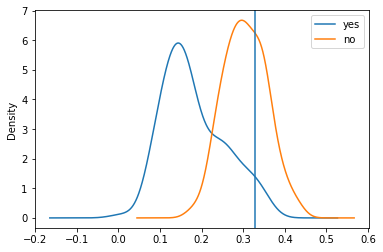

In [44]:
a = df[df.decision == "Yes"].distance.plot.kde(label='yes')
a = df[df.decision == "No"].distance.plot.kde(label='no')
threshold = round(tp_mean + 2 * tp_std, 4)
a.axvline(x=threshold)
a.legend()

In [ ]:
threshold = round(tp_mean + 4 * tp_std, 4)

In [1]:
import numpy as np

from scipy import spatial

from deepface.DeepFace import build_model

model = build_model('Facenet512')

a = np.load('./database/nguyen_xuan_phuc.npy')
b = np.load('./database/pham_minh_chinh.npy')

pos = []
neg = []
for i, embedding1 in enumerate(a):
    for j, embedding2 in enumerate(a):
        dis = spatial.distance.cosine(embedding1, embedding2)
        pos.append(dis)
for i, embedding1 in enumerate(b):
    for j, embedding2 in enumerate(b):
        dis = spatial.distance.cosine(embedding1, embedding2)
        pos.append(dis)

for i, embedding1 in enumerate(a):
    for j, embedding2 in enumerate(b):
        dis = spatial.distance.cosine(embedding1, embedding2)
        neg.append(dis)



In [2]:
print(max(pos))
print(min(pos))
print(min(neg))
print(max(neg))

0.5996777659156094
0
0.28521366927918435
0.6468299792085042


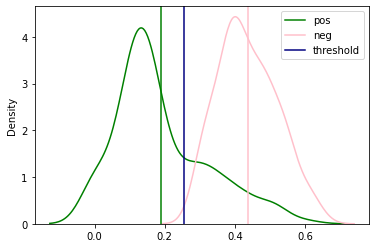

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(pos, label='pos', color='green')
sns.kdeplot(neg, label='neg', color='pink')
threshold = round(tp_mean + 0.5 * tp_std, 4)
plt.axvline(x=threshold, label='threshold', color='navy')
plt.axvline(x=tp_mean, color='green')
plt.axvline(x=fp_mean, color='pink')
plt.legend()
plt.show()

In [22]:
threshold

0.2553

In [11]:
tp_mean = round(np.mean(pos), 4)
tp_std = round(np.std(pos), 4)
fp_mean = round(np.mean(neg), 4)
fp_std = round(np.std(neg), 4)
print("Mean of true positives: ", tp_mean)
print("Std of true positives: ", tp_std)
print("Mean of false positives: ", fp_mean)
print("Std of false positives: ", fp_std)

Mean of true positives:  0.1894
Std of true positives:  0.1317
Mean of false positives:  0.4362
Std of false positives:  0.0832
